\begin{align}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\   \nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

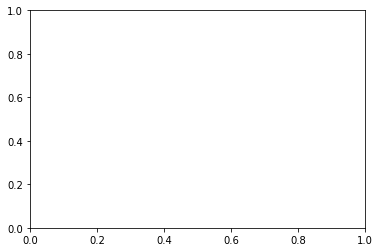

In [2]:
%matplotlib inline
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import math

from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots()



In [2]:
ax.grid(True, linestyle = '--', color = 'black')
ax.set_xlim(( -6, 6))
ax.set_ylim((-2, 2))
ax.annotate('Oscillating at [1.5,1]', xy=(1.5, 1), xytext=(-1, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),)

line, = ax.plot([], [], lw=1)
line1, = ax.plot([], [], lw=2)
line3, = ax.plot([], [], 'bx')
line4, = ax.plot([], [], 'g-.')
line5, = ax.plot([], [], 'y-')
line6, = ax.plot([], [], 'y-')


def gaussian(x,x0,sigma):
  return np.exp(-np.power((x - x0)/sigma, 2.)/2.)

def init():
    line.set_data([], [])
    line1.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line5.set_data([], [])
    return (line,line1,line3,line4,line5,line6,)

def animate(i):
    z = 1.5
    x = np.linspace(-6, 6, 250)
    y = np.sin(4 * np.pi * (x - 0.03 * i))
    # y1 = 0.5*np.sin(4 * np.pi * (x + 0.025 * i))
    y1 = gaussian(x, i*(.0003+.15)-8, .5) * np.sin(4 * np.pi * (x - 0.03 * i))
    #y1 = 0.75/2 * signal.square(2 * np.pi * (x + 0.01 * i)) + 0.75/2
    p = math.sin(4 * np.pi * (z - 0.03 * i))
    g = gaussian(x, i*(.0003+.15)-8, .5)
    # .square
    # 0.5*np.sin(4 * np.pi * (x + 0.025 * i))
    
    #line.set_data(x, y)
    line1.set_data(x, y1)
    line3.set_data([z,z], p)
    line4.set_data([z,z], [-1,1])
    line5.set_data(x, g)
    line6.set_data(x, -g)
    return (line1,line3,line4,line5,line6,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, 
                               blit=True)

HTML(anim.to_html5_video())

In [3]:
help(animation.FuncAnimation)

Help on class FuncAnimation in module matplotlib.animation:

class FuncAnimation(TimedAnimation)
 |  Makes an animation by repeatedly calling a function ``func``.
 |  
 |  Parameters
 |  ----------
 |  fig : matplotlib.figure.Figure
 |     The figure object that is used to get draw, resize, and any
 |     other needed events.
 |  
 |  func : callable
 |     The function to call at each frame.  The first argument will
 |     be the next value in ``frames``.   Any additional positional
 |     arguments can be supplied via the ``fargs`` parameter.
 |  
 |     The required signature is::
 |  
 |        def func(frame, *fargs) -> iterable_of_artists:
 |  
 |  frames : iterable, int, generator function, or None, optional
 |      Source of data to pass ``func`` and each frame of the animation
 |  
 |      If an iterable, then simply use the values provided.  If the
 |      iterable has a length, it will override the ``save_count`` kwarg.
 |  
 |      If an integer, then equivalent to passing 